In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [2]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### Find which state has the highest average total_amount per order, and which has the lowest. Then create a bar plot of average order value for the top 8 states by total sales.

In [23]:
state_analysis=df.groupby('state')['total_amount']\
    .agg(avg_order_value='mean',total_sale='sum',order_count='count')\
    .sort_values(by='avg_order_value',ascending=False)\
    .reset_index()

highest=state_analysis.sort_values(by='avg_order_value',ascending=False).iloc[0]
lowest=state_analysis.sort_values(by='avg_order_value').iloc[0]


top8_states=state_analysis.sort_values(by='avg_order_value',ascending=False).head(8)
top8_states

,state,avg_order_value,total_sale,order_count
0,Tamil Nadu,47647.790682,2096502.79,44
1,Chhattisgarh,36316.018889,3268441.70,90
2,Assam,33874.491698,1795348.06,53
3,Odisha,29222.123137,1490328.28,51
4,Goa,23374.469867,1753085.24,75
5,Bihar,22365.628000,1341937.68,60
6,Maharashtra,19638.678590,1531816.93,78
7,Punjab,19519.989767,839359.56,43


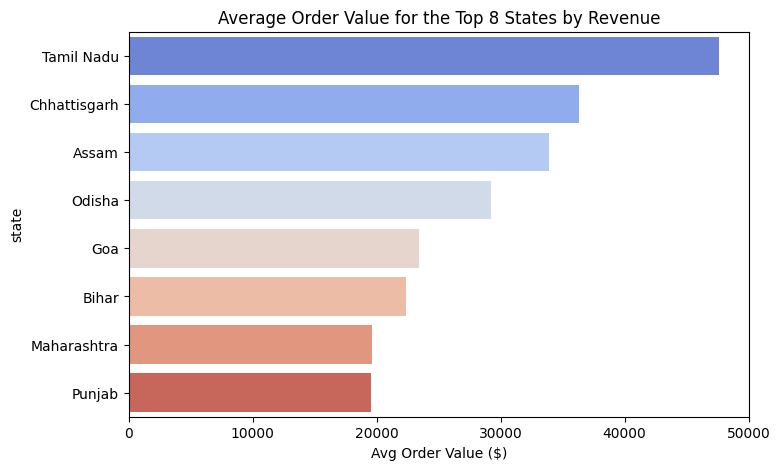

In [34]:
plt.figure(figsize=(8,5))


sns.barplot(
    data=top8_states,
    y='state',
    x='avg_order_value',
    hue='state',
    palette='coolwarm'
)

plt.title('Average Order Value for the Top 8 States by Revenue')
plt.xlabel('Avg Order Value ($)')
plt.show()